In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()
df.describe()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


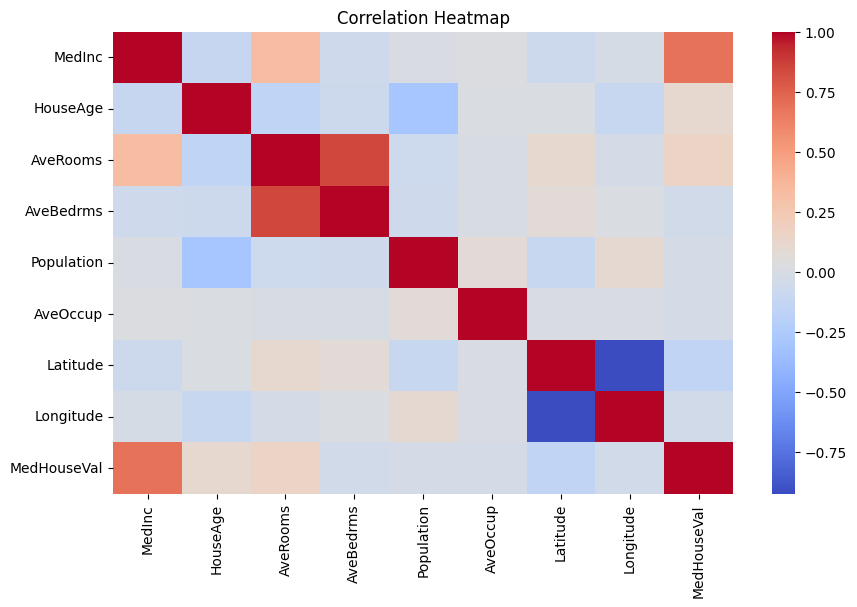

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


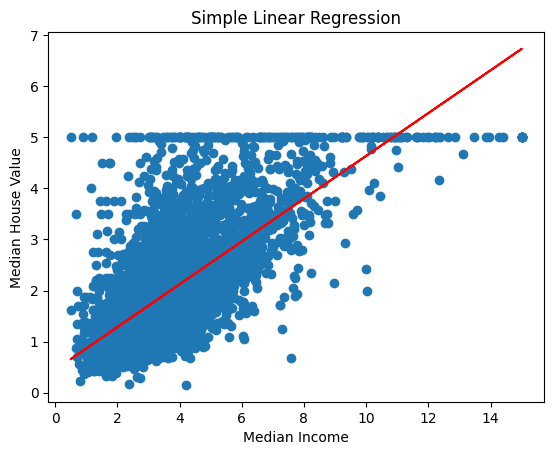

Slope: 0.4193384939381271
Intercept: 0.4445972916907879


In [6]:
X = df[['MedInc']]
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.show()

print("Slope:", slr.coef_[0])
print("Intercept:", slr.intercept_)



In [7]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_pred = mlr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)



MSE: 0.5558915986952444
RMSE: 0.7455813830127764
R² Score: 0.5757877060324508


In [8]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['MedInc']])

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.7032732680932143
R² Score: 0.46331772769346236


In [9]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

print("Ridge Coefficients:\n", ridge.coef_)
print("\nLasso Coefficients:\n", lasso.coef_)


Ridge Coefficients:
 [ 0.          0.53351356 -0.01050169]

Lasso Coefficients:
 [ 0.          0.50730643 -0.00834812]


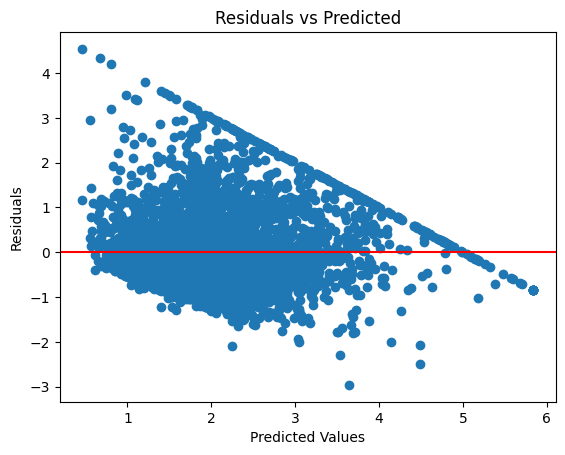

In [10]:
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()
